# OroraTech Data Analyst

The project analyzes wildfire in Lai Chau - a state of Vietnam - a South East Asia Country. The analyzed area is 40x40 km and timespan is from January 2019 to December 2019. The period of time should include at least 3-5 year to make the stronger conclusion but because the dataset is considerably heavy to load into the system, therefore one year period was used to analyze. 

Two Hypothesises are proposed to test in the project: 
- 1. 
- 2. 

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from pylab import *
from mpl_toolkits.basemap import Basemap

In [3]:
#load datas
ds = xr.open_mfdataset('..//WILDFIRE-DATA-ANALYSIS//data//*2019.nc')
print(ds)


<xarray.Dataset>
Dimensions:                          (time: 12, lat: 720, lon: 1440,
                                      vegetation_class: 18, bounds: 2)
Coordinates:
  * lat                              (lat) float64 89.88 89.62 ... -89.62 -89.88
  * lon                              (lon) float64 -179.9 -179.6 ... 179.6 179.9
  * time                             (time) datetime64[ns] 2019-01-01 ... 201...
  * vegetation_class                 (vegetation_class) int32 -2147483647 ......
Dimensions without coordinates: bounds
Data variables:
    burned_area                      (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    standard_error                   (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_burnable_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_observed_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta

In [5]:
ds.data_vars

Data variables:
    burned_area                      (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    standard_error                   (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_burnable_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_observed_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    number_of_patches                (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    burned_area_in_vegetation_class  (time, vegetation_class, lat, lon) float32 dask.array<chunksize=(1, 18, 720, 1440), meta=np.ndarray>
    lat_bounds                       (time, lat, bounds) float64 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bounds                       (time, lon, bounds) float64 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    time_bounds                  

Chosen location is Lai Chau, north side of Vietnam where wildfires normally occur during dry weather, in addition to complicated climate changes, a large accumulation of combusible materials. (40 km x 40 km)

In [6]:
#Extract the location
latbounds = [22.464,22.123]
lonbounds = [102.377,102.809]

Hypothesis number 1: Most of the wildfire in Vietnam occured in dry season, mostly from March to August.

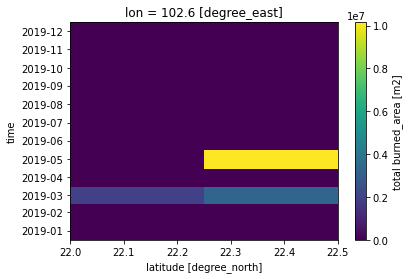

In [37]:
total_bunred_area_vs_time  = ds.burned_area.sel(lat=slice(*latbounds), lon=slice(*lonbounds))
total_bunred_area_vs_time.plot()

There are two wildfire in LaiChau in 2019, first is in March with 2 square kilometers, second is 10 km2 in May

Let choose another popular location about wildfire in Vietnam, which is in the middle of Vietnam: Quang Nam - Quang Ngai

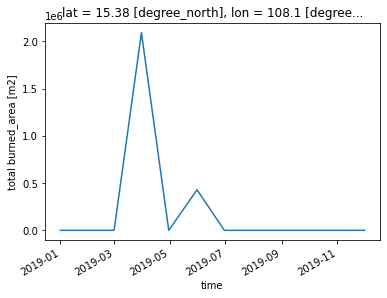

In [35]:
latbounds1 = [15.603,15.128]
lonbounds1 = [107.930,108.347]
total_bunred_area_vs_time1  = ds.burned_area.sel(lat=slice(*latbounds1), lon=slice(*lonbounds1))
total_bunred_area_vs_time1.plot()

In the middle of the country, most of wildfire happened after March until the end of July

By check in two areas. I conclude that the hypothesis the wildfire normally happened in dry weather, specific from March to August is totally precise. 

In [12]:
ds.fraction_of_burnable_area

<xarray.DataArray 'fraction_of_burnable_area' (time: 12, lat: 720, lon: 1440)>
dask.array<concatenate, shape=(12, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-12-01
Attributes:
    long_name:  fraction of burnable area
    units:      1
    comment:    The fraction of burnable area is the fraction of the cell tha...

Hypothesis 2: Most of wildfire in Vietnam occur with a smale scale

In [18]:
burned_area_in_vegetation_class_vs_time =  ds.burned_area_in_vegetation_class.sel(lat=slice(*latbounds), lon=slice(*lonbounds))

(array([419.,   5.,   2.,   3.,   1.,   0.,   0.,   0.,   0.,   2.]),
 array([      0.,  311255.,  622510.,  933765., 1245020., 1556275.,
        1867530., 2178785., 2490040., 2801295., 3112550.], dtype=float32),
 <BarContainer object of 10 artists>)

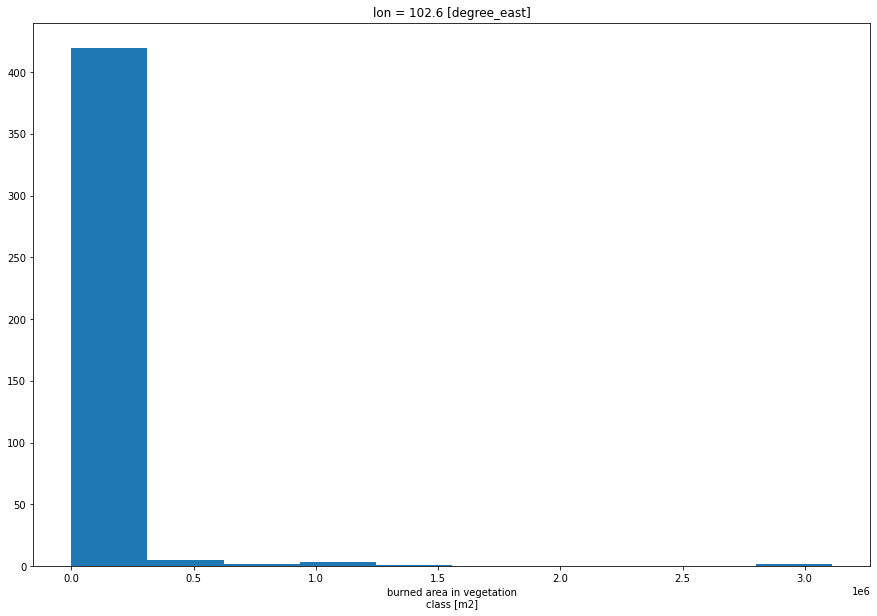

In [19]:
plt.figure(figsize = (15,10))
burned_area_in_vegetation_class_vs_time.plot()

In [51]:
bg = burned_area_in_vegetation_class_vs_time.to_dataframe()
print(bg.count())
print(bg[bg>2].count())
print(bg[bg<5].count())

burned_area_in_vegetation_class    432
dtype: int64
burned_area_in_vegetation_class    18
dtype: int64
burned_area_in_vegetation_class    414
dtype: int64


The area of ​​forest fire in the area is only under 500 thousand square meters (414 cases - 95%). There is 18 cases (4%) which fired areas up to 3 km2